In [4]:
import torch

import sys
sys.path.append("../")

from prototype.user_profile_host.recommender import (SinglePointWeightedAxesRecommender, BayesianRecommender)
from prototype.user_profile_host.utils import display_generated_points

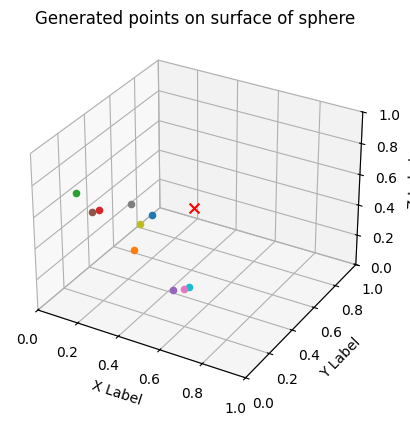

In [9]:
# test single point + weighted axes recommender
latent_bounds = (0., 1.)
dummy_user_profile = torch.rand(size=(3,))
embedding_bounds = (0., 1.)
single_weighted_recommender = SinglePointWeightedAxesRecommender(n_latent_axis=1, n_embedding_axis=2,
                                                                    exploration_factor=1.0)
weighted_axes_recommendations = single_weighted_recommender.recommend_embeddings(user_profile=dummy_user_profile,
                                                                                    n_recommendations=10)
if dummy_user_profile.shape[0] == 3:
    display_generated_points(weighted_axes_recommendations, user_profile=dummy_user_profile,
                                x_bounds=embedding_bounds, y_bounds=embedding_bounds, z_bounds=embedding_bounds)